## Data analysis on the Titanic Dataset

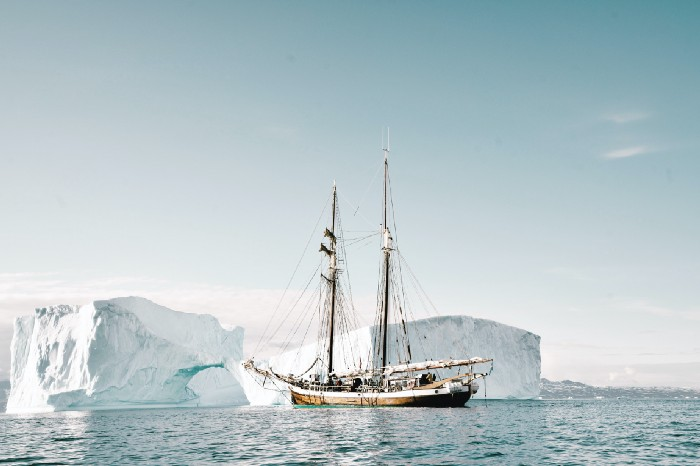

One of the most well-known shipwrecks in history was the RMS Titanic. Out of 2224 passengers and crew, 1502 died when the Titanic sank on April 15, 1912, during her maiden voyage after striking an iceberg. The international society was stunned by this shocking catastrophe, which prompted improved ship safety rules. The lack of lifeboats for the passengers and crew was one of the factors that contributed to the shipwreck's high death toll. Some groups of people had a higher chance of surviving the sinking than others, such as women, children, and the upper class, even though there was some element of luck involved. In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular answer the following question 

**Questions to answer include:**
- Who were the passengers on the Titanic?
- What deck were the passengers on?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?
- Did having a family member increase the odds of surviving the crash?
- Did the deck have an effect on the passengers survival rate?

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

##visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head() ##print the first 5 rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The `.describe()` technique offers some fundamental statistical information, and we may also draw some valuable conclusions from it. Moving through the columns:

- The Survived column's mean value is 0.38, which indicates that, on average, more people perished than survived.

- The passengers ranged in age from an infant to an elderly person who was 80 years old, with an average age of 29.

- The Age column's count does not match the counts for the other columns, which all show null values that we should be aware of.

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***With the information provided by Kaggle, below are some details that will help give us more clarity***

- Passenger ID — unique ID that identifies each passenger
- Survived — 0 means never survive, 1 means survive
- Pclass — Passenger class (1,2 or 3)
- SibSp — Number of siblings/spouse onboard the Titanic
- Parch — Number of parents/children onboard the Titanic
- Ticket — Ticket number
- Cabin — Cabin number, where the passengers stay
- Embarked — The location where the passengers board the Titanic ( C=Cherbourg, Q= Queenstown, S=Southampton)

In [6]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
titanic_df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(titanic_df.Survived, titanic_df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
titanic_df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(titanic_df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
titanic_df.Age[titanic_df.Pclass == 1].plot(kind='kde')    
titanic_df.Age[titanic_df.Pclass == 2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
titanic_df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(titanic_df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7764\3041794147.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='y')


## 1. Who were the passengers onboard the Titanic?

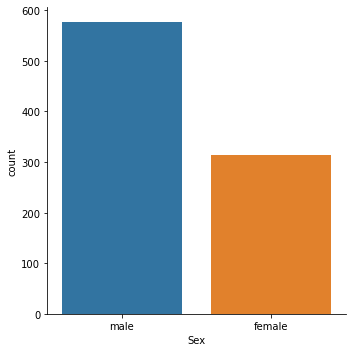

In [7]:
##print a catplot to shows the values of the Sex (male or female) column.
sns.catplot(x='Sex',data=titanic_df, kind='count')
plt.show()

Dividing the passengers into their respective classes and by gender and discovered that class 3 has more than 50% male passengers.

In [8]:
##define a function to show not just sex but male/female and children
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [9]:
##apply the function and create a new column
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [10]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

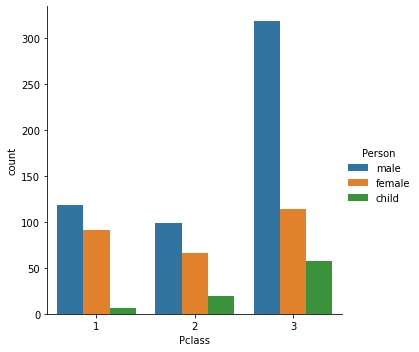

In [11]:
sns.catplot(x='Pclass',data=titanic_df,hue='Person',kind='count')
plt.show()

There are more a lot more male passengers as compared to females onboard the Titanic.

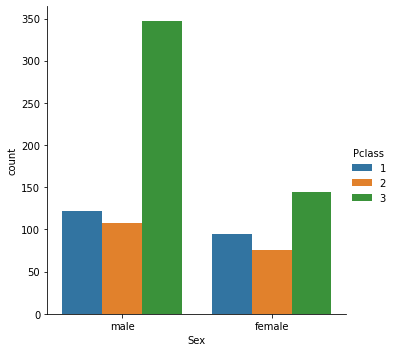

In [12]:
##print a catplot to show the sex distrbution into the difference classes.
sns.catplot(x='Sex',data=titanic_df,kind ='count',hue='Pclass')
plt.show()

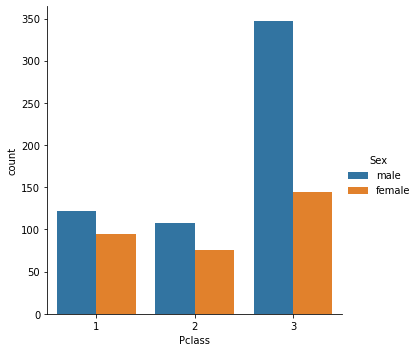

In [13]:
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Sex')
plt.show()

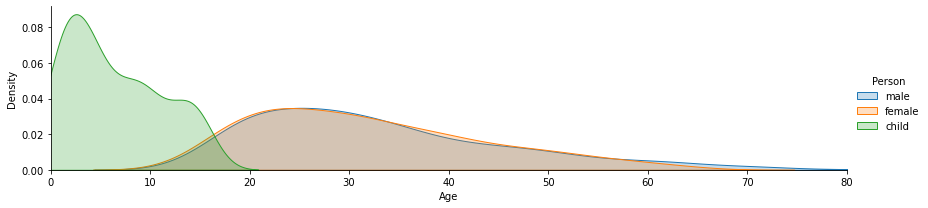

In [14]:
## plot a kdeplot for person(male,female,child)
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))

fig.add_legend()
plt.show()

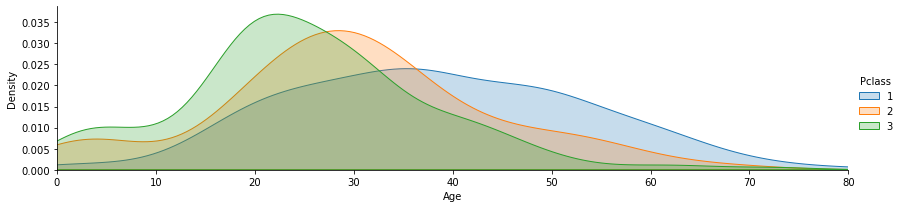

In [15]:
## plot a kdeplot for Pclass
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))

fig.add_legend()
plt.show()

KDE plots display relative distribution, which is the percentage of the dataset that adds up to 1 or 100%, and they are useful for visualising distribution among huge datasets.

## 2. What deck were the passengers on?

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The `Cabin` column has some missing data so before we continue it'd be good to drop the missing data before counting the numbers of passengers on each deck.

In [17]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

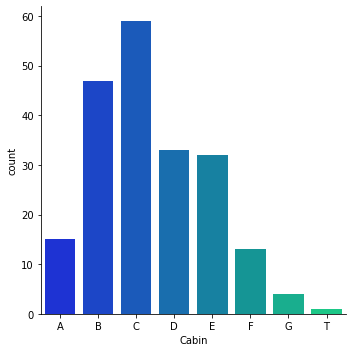

In [18]:
levels = []

#to get the first alphabet of the cabin they are in
for level in deck:
    levels.append(level[0])

#print(levels)

cabin_df = pd.DataFrame(levels)
cabin_df.columns= ['Cabin']


#plot the categorical plot base on the different type of cabin they are in
sns.catplot(x='Cabin',data=cabin_df.sort_values('Cabin'),palette='winter',kind='count')
plt.show()

The initial letter of the cabin identifies the deck that it is on, and we are interested in learning more about how the decks are distributed.

In [19]:
cabin_df.value_counts()

Cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
dtype: int64

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


## 3. Where did the passengers come from?

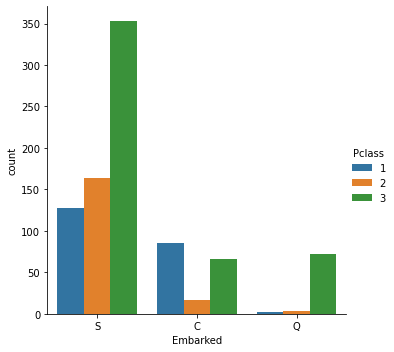

In [21]:
#embarked is which city they embarked on. can refer to kaggle for more details
# s = Southampton, c = Cherboug, q = Queenstown

#plot to find how which passengers are in which class
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', kind='count')
plt.show()

Plot to determine the gender of each city's passengers (male, female, or person)

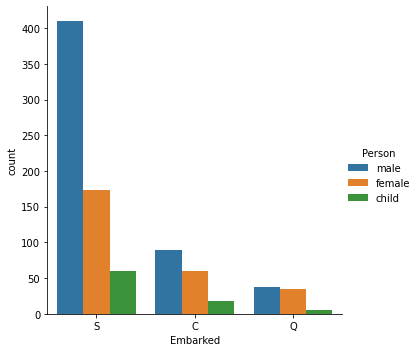

In [22]:
sns.catplot(x='Embarked', data=titanic_df, hue='Person', kind='count')
plt.show()

## 4. Who was alone and who was with family?

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


We are interested in learning which travellers travelled alone and who accompanied them. Since there is no column in the dataset that indicates such, we can utilise the columns "SibSp" and "Parch" to aid in our analysis.

To further clarify, if the "SibSp" or "Parch" column has a value greater than 0, it indicates that the traveller was accompanied by a sibling, spouse, parent, or child. This indicates that the traveller was accompanied by a relative.

- SibSp — Number of siblings/spouse onboard the Titanic
- Parch — Number of parents/children onboard the Titanic

Similar to the previous example, if the both column has a value of 0, it indicates that the passenger did not bring any family members.

Thus, we can create a new column based on the values of 0 or more from the previous two columns.

In [24]:
#make a column to define passengers who are alone and so any value more than zero means they had a family (sibiling,parents,cjild)
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [25]:
#now rename the 0 to alone and more than 0 to be with a family
titanic_df['Alone'].loc[titanic_df.Alone>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df.Alone==0] = 'Alone'

C:\Users\HP\AppData\Local\Temp\ipykernel_7764\499199352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df.Alone>0] = 'With Family'


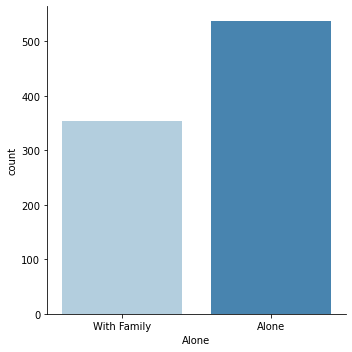

In [26]:
sns.catplot(x='Alone',data=titanic_df,kind='count',palette='Blues')
plt.show()

The data was then plotted into a catplot, allowing us to see that there were far more single travellers than passengers travelling with family.

## 5. What factors helped someone survive the sinking?

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


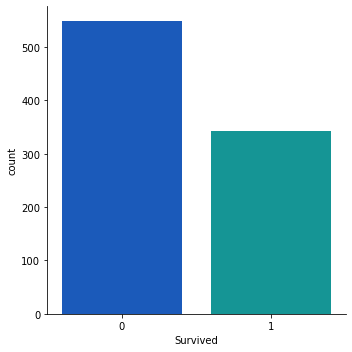

In [28]:
sns.catplot(x='Survived', data= titanic_df, kind='count', palette='winter')
plt.show()

Let's start by taking a look at the survival rate in general. Sadly, fewer passengers from the Titanic survived the collision.

In [29]:
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


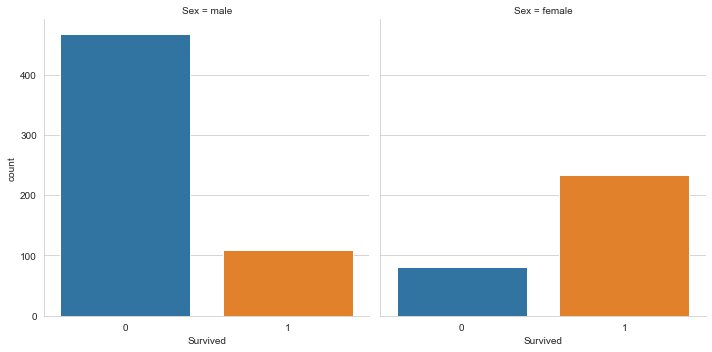

In [30]:
sns.set_style('whitegrid')

sns.factorplot(x='Survived', col='Sex', kind='count', data=titanic_df)
plt.show()

As we all know from the movie and the Titanic's true tragedy, women were given preference when rescue people. The same narrative is also shown in the graph above. Male passengers have died at a higher rate than female ones.

Let's similarly attempt to determine how the variables `Pclass` and `Survived` are related.

The following code snippet would be used to create a countplot to do this.

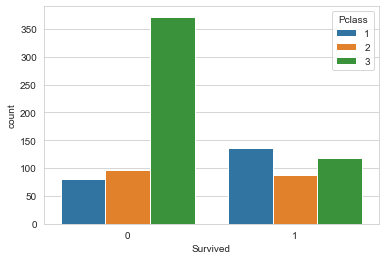

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.show()

According to the graph, `Pclass-3` students had a higher chance of surviving. It was intended for the wealthy, and because `Pclass-1` was comparatively less expensive than `Pclass 3`, they were the most likely victims.

Let's attempt a thorough understanding of the **Sibsip** column. We would once more use the countplot from seaborn to do this. The identical result might be obtained with the following piece of code.

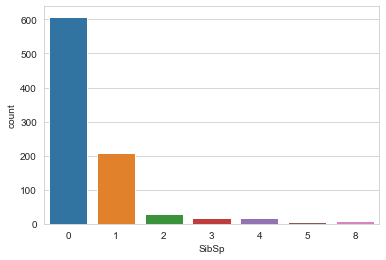

In [32]:
sns.countplot(x='SibSp', data=titanic_df)
plt.show()

The number of siblings or spouses the person was travelling with is indicated by the variable SibSp in this instance. We can tell that most of the visitors arrived alone.

## 6. Did having a family member increase the odds of surviving the crash?

In [33]:
pd.crosstab(titanic_df['Alone'],titanic_df['Survived'])

Survived,0,1
Alone,,
Alone,374,163
With Family,175,179


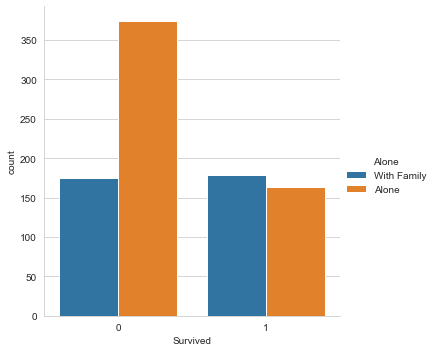

In [34]:
#plot alone column vs survived column 

sns.catplot(x='Survived',hue='Alone',data=titanic_df,kind='count')
##can see that generally more people who has a family s

There is a 50/50 chance of survival if the passenger is travelling with their family. However, just 30% of travellers who arrive alone will survive.

## Did the deck have an effect on the passengers survival rate?

In [35]:
#drop na values in the cabin column
titanic_df = titanic_df.dropna(subset=['Cabin'])

In [36]:
##need to reset index first
titanic_df=titanic_df.reset_index(drop=True)

In [37]:
titanic_df['Deck']=cabin_df

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Deck
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,G
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,C


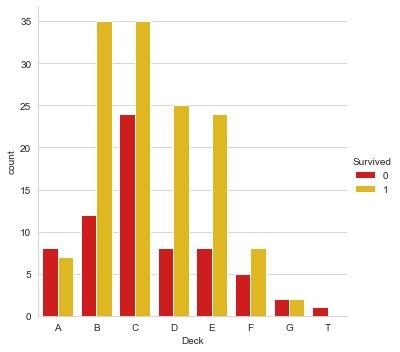

In [38]:
#plot a cat plot for deck vs survived to see which deck has a higher survivor rate
sns.catplot(x='Deck',hue='Survived',data=titanic_df.sort_values('Deck'),kind='count',palette='hot')
plt.show()

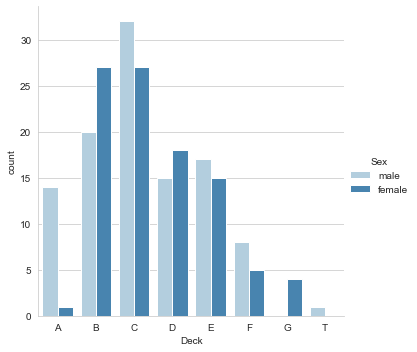

In [39]:
#plot to see the person breakdown in each deck
sns.catplot(x='Deck',hue='Sex',data=titanic_df.sort_values('Deck'),kind='count',palette='Blues')
plt.show()

Here, I have accomplished a lot. Understanding the data and conducting a more thorough analysis to determine who is most likely to have survived the Titanic accident.

These are the conclusions we've reached based on the analysis so far:


- Male passengers outnumbered female ones on board. But more female passengers made it through the collision. The best probability of surviving the crash belongs to a female passenger in her 20s who is travelling with a family that is staying in passenger class A or B.

- Male passengers travelling alone would probably not survive the collision.

